In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib import gridspec
import pandas as pd
import numpy as np
import zipfile

DiaData: https://openhsu.ub.hsu-hh.de/entities/publication/20048

Quick statistics base don chunk of 9,000,000 rows:

* 137 patients
* no. of recorded events by patient vary from 183 to 130,577
* the date range across all patients is from 1.01.2000 to 22.03.2023
* continuous recorded periods for each patient vary from 1 day to 453 days

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!gzip "/content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/maindatabase1.csv"

In [ ]:
file_path = "/content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/maindatabase1.csv.gz"
diadata_df = pd.read_csv(file_path, sep=",", chunksize=9000000, low_memory=False)
for i, diadata in enumerate(diadata_df):
    print(f"Chunk {i} loaded, {len(diadata)} rows")
    print(diadata.head())
    break

In [ ]:
#zip_path  = r"C:\Users\meril\Desktop\Projekt_ML\DiaData\maindatabase\maindatabase1.zip"

#with zipfile.ZipFile(zip_path) as z:
    #print(z.namelist())

    #with z.open("maindatabase1.csv") as f:
        #diadata_df = pd.read_csv(f,
                        #sep=",",
                         #chunksize=9000000, low_memory=False)
        #or i, diadata in enumerate(diadata_df):
            #print(f"Chunk {i} loaded, {len(diadata)} rows")
            #break

        #diadata['ts'] = pd.to_datetime(diadata['ts'], errors='coerce')
        #display(diadata.head(10))

['maindatabase1.csv', '__MACOSX/._maindatabase1.csv']
Chunk 0 loaded, 9000000 rows


,ts,PtID,GlucoseCGM,Database
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO
5,2014-10-01 19:40:00,001_D1NAMO,165.784,D1NAMO
6,2014-10-01 19:45:00,001_D1NAMO,160.378,D1NAMO
7,2014-10-01 19:50:00,001_D1NAMO,156.774,D1NAMO
8,2014-10-01 19:55:00,001_D1NAMO,151.368,D1NAMO
9,2014-10-01 20:00:00,001_D1NAMO,147.764,D1NAMO


In [ ]:
diadata = diadata.rename(columns={'ts': 'DataDtTm'})
diadata = diadata.rename(columns={'GlucoseCGM': 'CGM'})
diadata['DataDtTm'] = pd.to_datetime(diadata['DataDtTm'], format='%d%b%y:%H:%M:%S')
diadata.head()

,DataDtTm,PtID,CGM,Database
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO


In [ ]:
len(diadata) # 9 000 000

9000000

In [ ]:
diadata['PtID'].value_counts().sort_index()

PtID
001_D1NAMO        1413
002_D1NAMO        1141
003_D1NAMO         183
004_D1NAMO         969
005_D1NAMO         909
                 ...  
12.0_SENCE      104799
12.0_SHD          4308
120.0_CITY       89289
120.0_DLCP3      58176
120.0_RT-CGM      3298
Name: count, Length: 137, dtype: int64

In [ ]:
diadata['PtID'].value_counts()

PtID
103.0_PEDAP     130577
117.0_RT-CGM    112819
105.0_CITY      111698
115.0_RT-CGM    111623
10.0_SENCE      111623
                 ...  
002_D1NAMO        1141
007_D1NAMO        1089
004_D1NAMO         969
005_D1NAMO         909
003_D1NAMO         183
Name: count, Length: 137, dtype: int64

In [ ]:
diadata["PtID"].unique()

array(['001_D1NAMO', '002_D1NAMO', '003_D1NAMO', '004_D1NAMO',
       '005_D1NAMO', '006_D1NAMO', '007_D1NAMO', '008_D1NAMO',
       '009_D1NAMO', '1.0_CITY', '1.0_DLCP3', '1.0_PEDAP', '1.0_RT-CGM',
       '1.0_SENCE', '1.0_SHD', '10.0_CITY', '10.0_DLCP3', '10.0_PEDAP',
       '10.0_RT-CGM', '10.0_SENCE', '10.0_SHD', '100.0_DLCP3',
       '100.0_PEDAP', '100.0_RT-CGM', '100.0_SENCE', '100.0_SHD',
       '101.0_CITY', '101.0_DLCP3', '101.0_PEDAP', '101.0_RT-CGM',
       '101.0_SHD', '102.0_CITY', '102.0_DLCP3', '102.0_PEDAP',
       '102.0_RT-CGM', '102.0_SENCE', '102.0_SHD', '103.0_CITY',
       '103.0_DLCP3', '103.0_PEDAP', '103.0_RT-CGM', '103.0_SENCE',
       '103.0_SHD', '104.0_CITY', '104.0_DLCP3', '104.0_PEDAP',
       '104.0_RT-CGM', '104.0_SENCE', '104.0_SHD', '105.0_CITY',
       '105.0_DLCP3', '105.0_PEDAP', '105.0_RT-CGM', '105.0_SENCE',
       '105.0_SHD', '106.0_CITY', '106.0_DLCP3', '106.0_PEDAP',
       '106.0_SENCE', '106.0_SHD', '107.0_CITY', '107.0_DLCP3',
       '107

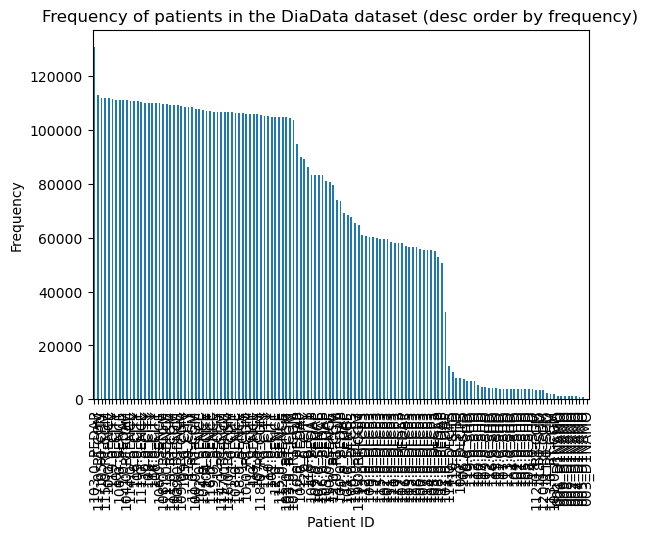

In [ ]:
diadata['PtID'].value_counts().plot(kind='bar')
plt.xlabel('Patient ID')
plt.ylabel('Frequency')
plt.title('Frequency of patients in the DiaData dataset (desc order by frequency)')
plt.show()

In [ ]:
# Extract date from 'DataDtTm' and sort
diadata['date'] = diadata['DataDtTm'].dt.date
diadata = diadata.sort_values(['PtID', 'DataDtTm'])

# Extract time from 'DataDtTm' and sort
diadata['time'] = diadata['DataDtTm'].dt.time
diadata['hour'] = diadata['DataDtTm'].dt.hour
diadata['minute'] = diadata['DataDtTm'].dt.minute
diadata = diadata.sort_values(['PtID', 'DataDtTm'])

# Calculate the time difference between two events
diadata['delta_min'] = diadata.groupby('PtID')['DataDtTm'].diff().dt.total_seconds() / 60

In [ ]:
min(diadata["date"])

datetime.date(2000, 1, 1)

In [ ]:
max(diadata["date"])

datetime.date(2023, 3, 22)

In [ ]:
overview = (
    diadata.groupby('PtID')['date']
    .agg(start_date='min', end_date='max')
    .reset_index()
)

# Teisendame datetime'iks
overview['start_date'] = pd.to_datetime(overview['start_date'])
overview['end_date'] = pd.to_datetime(overview['end_date'])

# Arvutame perioodi pikkuse päevades
overview['period_days'] = (overview['end_date'] - overview['start_date']).dt.days

overview = overview.sort_values(by='period_days', ascending=False)

overview

,PtID,start_date,end_date,period_days
39,40,2020-05-27,2021-08-23,453
115,116,2000-04-08,2001-05-05,392
49,50,2000-08-17,2001-09-09,388
19,20,2001-02-28,2002-03-23,388
105,106,2000-05-24,2001-06-16,388
...,...,...,...,...
7,8,2014-09-30,2014-10-04,4
6,7,2014-10-01,2014-10-05,4
4,5,2014-10-01,2014-10-04,3
3,4,2014-10-01,2014-10-04,3


In [ ]:
overview.sort_values(by='PtID').tail(20)

,PtID,start_date,end_date,period_days
117,118,2023-01-01,2023-01-17,16
118,119,2000-02-03,2001-02-22,385
119,120,2018-01-06,2018-07-18,193
120,121,2000-05-18,2001-05-19,366
121,122,2000-08-23,2001-08-27,369
122,123,2023-01-01,2023-01-13,12
123,124,2000-02-03,2001-02-24,387
124,125,2017-10-18,2018-05-15,209
125,126,2000-05-21,2001-01-01,225
126,127,2000-03-29,2001-04-04,371


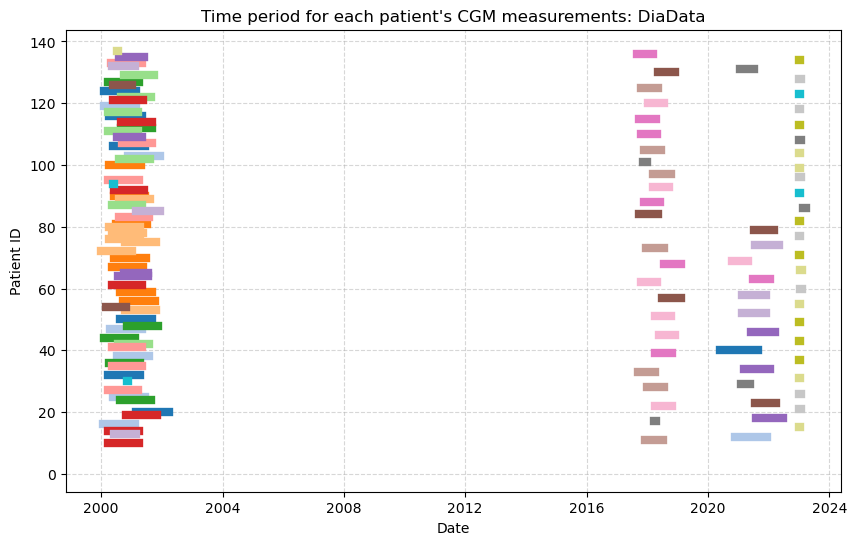

In [ ]:
patients = overview['PtID'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(patients)))
color_map = dict(zip(patients, colors))

plt.figure(figsize=(10,6))
for i, row in overview.iterrows():
    plt.plot([row.start_date, row.end_date], [row.PtID, row.PtID], linewidth=6, color=color_map[row['PtID']])
plt.xlabel("Date")
plt.ylabel("Patient ID")
plt.title("Time period for each patient's CGM measurements: DiaData")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

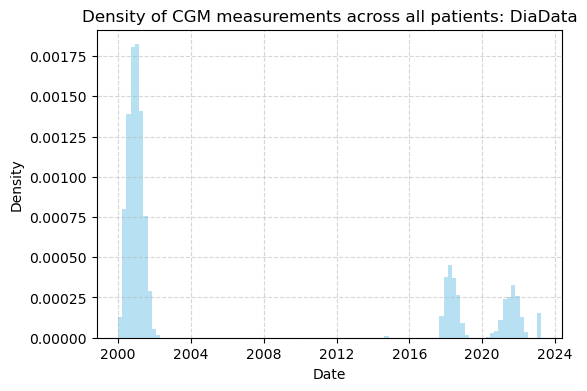

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(diadata['date'], bins=100, density=True, color='skyblue', alpha=0.6)
plt.title("Density of CGM measurements across all patients: DiaData")
plt.xlabel("Date")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

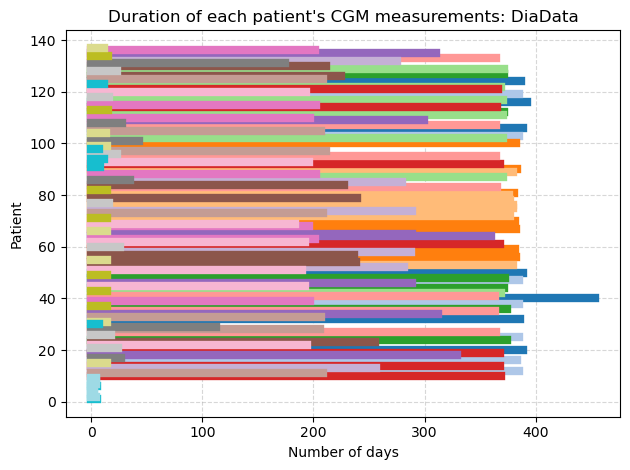

In [ ]:
patients = overview['PtID'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(patients)))
color_map = dict(zip(patients, colors))

# joonista iga patsiendi kast
for i, row in overview.iterrows():
    plt.plot([0, row['period_days']],  # x-teljel 0 kuni perioodi pikkus
             [row['PtID'], row['PtID']],  # y-teljel PtID
             linewidth=6,
             color=color_map[row['PtID']],
             label=row['PtID'] if i == np.where(patients == row['PtID'])[0][0] else None)

plt.xlabel("Number of days")
plt.ylabel("Patient ID")
plt.title("Duration of each patient's CGM measurements: DiaData")
plt.grid(True, linestyle='--', alpha=0.5)

# legend ainult, kui patsiente ei ole liiga palju
if len(patients) <= 20:
    plt.legend(title="Patient", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

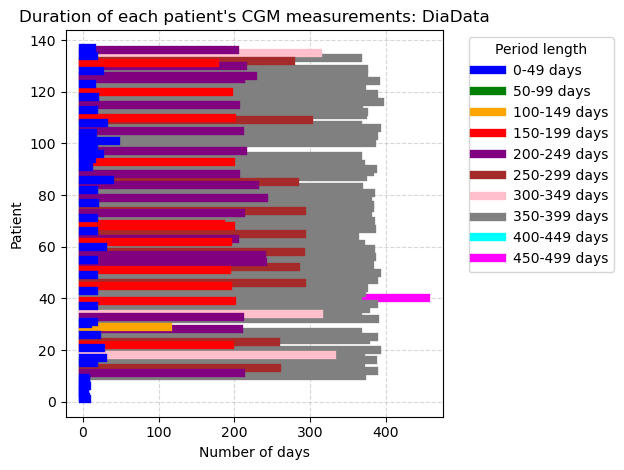

In [ ]:
bins = np.arange(0, 501, 50)

# Defineeri värvipalett, mis kordub
palette = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Joonista iga patsiendi kast
for i, row in overview.iterrows():
    period = row['period_days']

    # Leia millise binni see periood kuulub
    color_idx = np.digitize(period, bins) - 1
    color = palette[color_idx % len(palette)]  # korduv värvipalett

    plt.plot([0, period],
             [row['PtID'], row['PtID']],
             linewidth=6,
             color=color)

# Legend: iga bini jaoks üks värv
legend_elements = []
for i, start in enumerate(bins[:-1]):
    end = bins[i+1]-1
    color = palette[i % len(palette)]
    legend_elements.append(Line2D([0], [0], color=color, lw=6, label=f'{start}-{end} days'))

plt.xlabel("Number of days")
plt.ylabel("Patient")
plt.title("Duration of each patient's CGM measurements: DiaData")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(handles=legend_elements, title='Period length', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp,CGM_mmol,in_range,CGM_category
0,2014-10-01 19:15:00,1,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606,10.311444,False,hyperglycemia
1,2014-10-01 19:20:00,1,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398,9.911000,True,in_range
2,2014-10-01 19:25:00,1,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695,9.760833,True,in_range
3,2014-10-01 19:30:00,1,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992,9.610667,True,in_range
4,2014-10-01 19:35:00,1,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388,9.410444,True,in_range


In [ ]:
# Deviation of time into 6 standard time periods (given by supervisor)
def assign_period(hour):
    if 0 <= hour < 3:
        return '00:00–03:00'
    elif 3 <= hour < 9:
        return '03:00–09:00'
    elif 9 <= hour < 12:
        return '09:00–12:00'
    elif 12 <= hour < 17:
        return '12:00–17:00'
    elif 17 <= hour < 21:
        return '17:00–21:00'
    else:
        return '21:00–00:00'

In [ ]:
diadata['time_period'] = diadata['hour'].apply(assign_period)

In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp,CGM_mmol,in_range,CGM_category
0,2014-10-01 19:15:00,1,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606,10.311444,False,hyperglycemia
1,2014-10-01 19:20:00,1,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398,9.911000,True,in_range
2,2014-10-01 19:25:00,1,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695,9.760833,True,in_range
3,2014-10-01 19:30:00,1,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992,9.610667,True,in_range
4,2014-10-01 19:35:00,1,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388,9.410444,True,in_range


In [ ]:
# Count missing values at 'CGM'
print("Missing values at column 'CGM': ", diadata['CGM'].isna().sum()) # 3,523,824

print("\nSummary of column 'CGM'")
print(diadata['CGM'].describe())

Missing values at column 'CGM':  3523824

Summary of column 'CGM'
count    5.476176e+06
mean     1.794513e+02
std      7.793185e+01
min      1.600000e+01
25%      1.200000e+02
50%      1.650000e+02
75%      2.250000e+02
max      6.540000e+02
Name: CGM, dtype: float64


In [ ]:
#Interpolate missing values at column 'CGM'
diadata['CGM_interp'] = diadata.groupby('PtID')['CGM'].transform(lambda x: x.interpolate(limit=None).ffill().bfill())

In [ ]:
print("\nMissing values at column 'CGM_interp' after interpolation: ", diadata['CGM_interp'].isna().sum())  # 0

print("\nSummary of column 'CGM_interp' after interpolation")
print(diadata['CGM_interp'].describe())


Missing values at column 'CGM_interp' after interpolation:  0

Summary of column 'CGM_interp' after interpolation
count    9.000000e+06
mean     1.831989e+02
std      7.656584e+01
min      1.600000e+01
25%      1.260000e+02
50%      1.710000e+02
75%      2.280000e+02
max      6.540000e+02
Name: CGM_interp, dtype: float64


In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp
0,2014-10-01 19:15:00,001_D1NAMO,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606
1,2014-10-01 19:20:00,001_D1NAMO,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398
2,2014-10-01 19:25:00,001_D1NAMO,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695
3,2014-10-01 19:30:00,001_D1NAMO,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992
4,2014-10-01 19:35:00,001_D1NAMO,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388


In [ ]:
# As string are more complicate dto handle (and I just don't like to deal with strings :) ), let's do some re-indexing
unique_ids = diadata['PtID'].unique()
unique_ids

array(['001_D1NAMO', '002_D1NAMO', '003_D1NAMO', '004_D1NAMO',
       '005_D1NAMO', '006_D1NAMO', '007_D1NAMO', '008_D1NAMO',
       '009_D1NAMO', '1.0_CITY', '1.0_DLCP3', '1.0_PEDAP', '1.0_RT-CGM',
       '1.0_SENCE', '1.0_SHD', '10.0_CITY', '10.0_DLCP3', '10.0_PEDAP',
       '10.0_RT-CGM', '10.0_SENCE', '10.0_SHD', '100.0_DLCP3',
       '100.0_PEDAP', '100.0_RT-CGM', '100.0_SENCE', '100.0_SHD',
       '101.0_CITY', '101.0_DLCP3', '101.0_PEDAP', '101.0_RT-CGM',
       '101.0_SHD', '102.0_CITY', '102.0_DLCP3', '102.0_PEDAP',
       '102.0_RT-CGM', '102.0_SENCE', '102.0_SHD', '103.0_CITY',
       '103.0_DLCP3', '103.0_PEDAP', '103.0_RT-CGM', '103.0_SENCE',
       '103.0_SHD', '104.0_CITY', '104.0_DLCP3', '104.0_PEDAP',
       '104.0_RT-CGM', '104.0_SENCE', '104.0_SHD', '105.0_CITY',
       '105.0_DLCP3', '105.0_PEDAP', '105.0_RT-CGM', '105.0_SENCE',
       '105.0_SHD', '106.0_CITY', '106.0_DLCP3', '106.0_PEDAP',
       '106.0_SENCE', '106.0_SHD', '107.0_CITY', '107.0_DLCP3',
       '107

In [ ]:
id_map = {old_id: i+1 for i, old_id in enumerate(unique_ids)}
diadata['PtID'] = diadata['PtID'].map(id_map)

In [ ]:
# Check
print(diadata['PtID'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137]


In [ ]:
# Convert mg/dL → mmol/L, because those are the units our supervisor gave us while giving an overview of the topic
diadata['CGM_mmol'] = diadata['CGM_interp'] / 18

# Create a column to check if the value of CGM is between 4–10 mmol/L
diadata['in_range'] = diadata['CGM_mmol'].between(4, 10)

In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp,CGM_mmol,in_range
0,2014-10-01 19:15:00,1,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606,10.311444,False
1,2014-10-01 19:20:00,1,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398,9.911000,True
2,2014-10-01 19:25:00,1,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695,9.760833,True
3,2014-10-01 19:30:00,1,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992,9.610667,True
4,2014-10-01 19:35:00,1,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388,9.410444,True


In [ ]:
# Classify by the CGM_mmol is it in range, hypoglycemia, or hyperglycemia
def classify_glucose(val): # in mmol/L
    if val < 4.0:
        return 'hypoglycemia'
    elif val <= 10:
        return 'in_range'
    else:
        return 'hyperglycemia'

In [ ]:
diadata['CGM_category'] = diadata['CGM_mmol'].apply(classify_glucose)

In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp,CGM_mmol,in_range,CGM_category
0,2014-10-01 19:15:00,1,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606,10.311444,False,hyperglycemia
1,2014-10-01 19:20:00,1,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398,9.911000,True,in_range
2,2014-10-01 19:25:00,1,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695,9.760833,True,in_range
3,2014-10-01 19:30:00,1,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992,9.610667,True,in_range
4,2014-10-01 19:35:00,1,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388,9.410444,True,in_range


In [ ]:
# Selecting patients by rank
def is_in_range_rank(pt_start, pt_end): # in mmol/L

    for pt in range(pt_start, pt_end+1):
        subset = diadata[diadata['PtID'] == pt]

        # Time in Range (must be >= 70%)
        TIR = subset['in_range'].mean() * 100

        print(f"Patient no. {pt} Time in Range: {TIR:.1f}%")
        if TIR < 70:
            print("Not in range (<70%)\n")
        elif TIR >= 70:
            print("In range (≥70%)!\n")
        else:
            print("Nan\n")

In [ ]:
# By selecting specific patients
def is_in_range_select(pts): # in mmol/L; pts is a vector

    for pt in pts:
        subset = diadata[diadata['PtID'] == pt]

        # Time in Range (must be >= 70%)
        TIR = subset['in_range'].mean() * 100

        print(f"Patient no. {pt} Time in Range: {TIR:.1f}%")
        if TIR < 70:
            print("Not in range (<70%)\n")
        elif TIR >= 70:
            print("In range (≥70%)!\n")
        else:
            print("Nan\n")

In [ ]:
# IMPORTANT: the blood sugar level should be between 4-10 mmol/L 70% of the time
pt_start = 16
pt_end = 16
is_in_range_rank(pt_start, pt_end)

Patient no. 16 Time in Range: 12.4%
Not in range (<70%)



In [ ]:
pts = [2,4,6,8,10]
is_in_range_select(pts)

Patient no. 2 Time in Range: 39.6%
Not in range (<70%)

Patient no. 4 Time in Range: 34.4%
Not in range (<70%)

Patient no. 6 Time in Range: 59.3%
Not in range (<70%)

Patient no. 8 Time in Range: 60.0%
Not in range (<70%)

Patient no. 10 Time in Range: 32.9%
Not in range (<70%)



In [ ]:
# Because the date range varies by patient
# So we write a function to find the data range with less pain :)
def patient_date_range(ptid):
    subset = diadata[diadata["PtID"] == ptid]
    if subset.empty:
        return None
    start = subset["date"].min().strftime("%d.%m.%Y")
    end = subset["date"].max().strftime("%d.%m.%Y")
    return start, end

In [ ]:
patient_date_range(16)

('26.01.2000', '12.02.2001')

In [ ]:
diadata["PtID"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137], dtype=int64)

Sektordiagramm ühe patsiendi kohta kindlal kuupäeva vahemikul, mil on vahemikus (4...10 mmol/L) ning millla neist piiridest väljas.

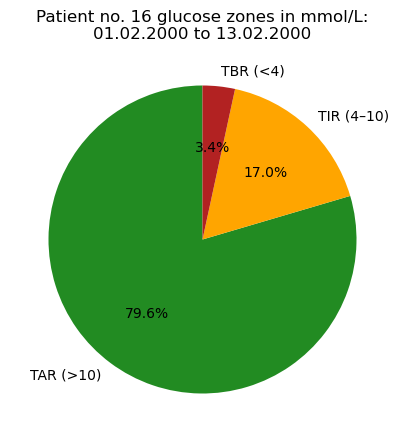

In [ ]:
# Proportions of:
# TBR - Time Below Range
# TIR - Time in Range
# TAR - Time Above Range
# in specific date range on specific patient

pt = 16
start_date = '2000-02-01'
end_date = '2000-02-13'

subset = diadata[
    (diadata['PtID'] == pt) &
    (diadata['date'] >= pd.to_datetime(start_date).date()) &
    (diadata['date'] <= pd.to_datetime(end_date).date())
].copy()

if subset.empty:
    print(f"Patient no. {pt} has no data between {start_date} -- {end_date}.")
else:
    # Mark the zones; TIR, TAR, and TBR
    subset['zone'] = np.select(
        [subset['CGM_mmol'] < 4,
         subset['CGM_mmol'].between(4, 10),
         subset['CGM_mmol'] > 10],
        ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
        default='missing'
    )

    counts = subset['zone'].value_counts(normalize=True) * 100

    start_date = pd.to_datetime(start_date).strftime("%d.%m.%Y")
    end_date = pd.to_datetime(end_date).strftime("%d.%m.%Y")

    if start_date == end_date:
        date_text = f"{start_date}"
    else:
        date_text = f"{start_date} to {end_date}"

    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
            colors=['forestgreen','orange','firebrick','gray'], startangle=90)
    plt.title(f'Patient no. {pt} glucose zones in mmol/L:\n{date_text}')
    plt.show()

Sama info sektordiagrammilt, ent nüüd joontena.

**NB!** Järgnev graafik on implementeeritud ka allpool olevasse suurde koondgraafikusse (kolm joonist iga patsendi kohta tol kuupäevade vahemikus).

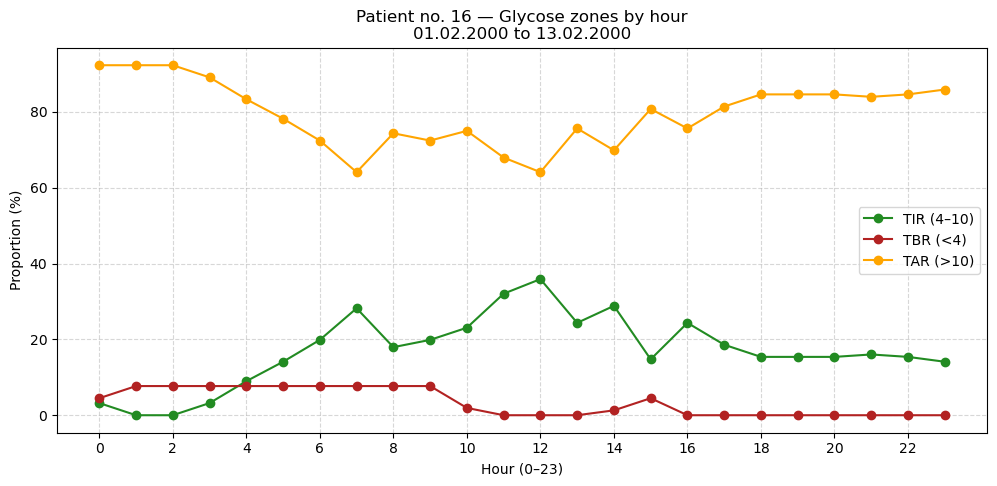

In [ ]:
# Proportions of:
# TBR - Time Below Range
# TIR - Time in Range
# TAR - Time Above Range
# in specific date range

pt = 16
start_date = '2000-02-01'
end_date = '2000-02-13'

subset = diadata[
    (diadata['PtID'] == pt) &
    (diadata['date'] >= pd.to_datetime(start_date).date()) &
    (diadata['date'] <= pd.to_datetime(end_date).date())
].copy()

if subset.empty:
    print(f"Patient no. {pt} has no data between {start_date} -- {end_date}.")
else:
    subset['zone'] = np.select(
        [subset['CGM_mmol'] < 4,
         subset['CGM_mmol'].between(4, 10),
         subset['CGM_mmol'] > 10],
        ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
        default='missing'
    )

    # Summary by hour
    hourly_summary = (
        subset.groupby('hour')['zone']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )

    # Check that all hours from 0 to 23 exist
    for h in range(24):
        if h not in hourly_summary.index:
            hourly_summary.loc[h] = [0,0,0]  # TBR, TIR, TAR
    hourly_summary = hourly_summary.sort_index()

    # Format date appearance
    start_date = pd.to_datetime(start_date).strftime("%d.%m.%Y")
    end_date = pd.to_datetime(end_date).strftime("%d.%m.%Y")

    if start_date == end_date:
        date_text = f"{start_date}"
    else:
        date_text = f"{start_date} to {end_date}"

    # Plotting
    plt.figure(figsize=(12,5))
    plt.plot(hourly_summary.index, hourly_summary.get('TIR (4–10)', 0), marker='o', color='forestgreen', label='TIR (4–10)')
    plt.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='TBR (<4)')
    plt.plot(hourly_summary.index, hourly_summary.get('TAR (>10)', 0), marker='o', color='orange', label='TAR (>10)')

    plt.xticks(range(0,24,2))
    plt.xlabel('Hour (0–23)')
    plt.ylabel('Proportion (%)')
    plt.title(f'Patient no. {pt} — Glycose zones by hour\n{date_text}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

Ühe patsiendi kogu meditsiiiniline ajalugu -- sektordiagramm.

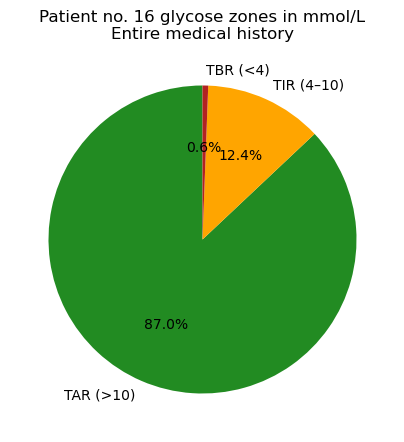

In [ ]:
# Proportions of:
# TBR - Time Below Range
# TIR - Time in Range
# TAR - Time Above Range
# on entire medical history

pt = 16

subset = diadata[diadata['PtID'] == pt].copy()

subset['zone'] = np.select(
    [subset['CGM_mmol'] < 4,
     subset['CGM_mmol'].between(4, 10),
     subset['CGM_mmol'] > 10],
    ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
    default='missing'
).astype(object)

counts = subset['zone'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
        colors=["forestgreen",'orange', 'firebrick', 'gray'], startangle=90)
plt.title(f'Patient no. {pt} glycose zones in mmol/L\nEntire medical history')
plt.show()

Ühe patsiendi kogu meditsiiniline ajalugu -- joondiagrammina.

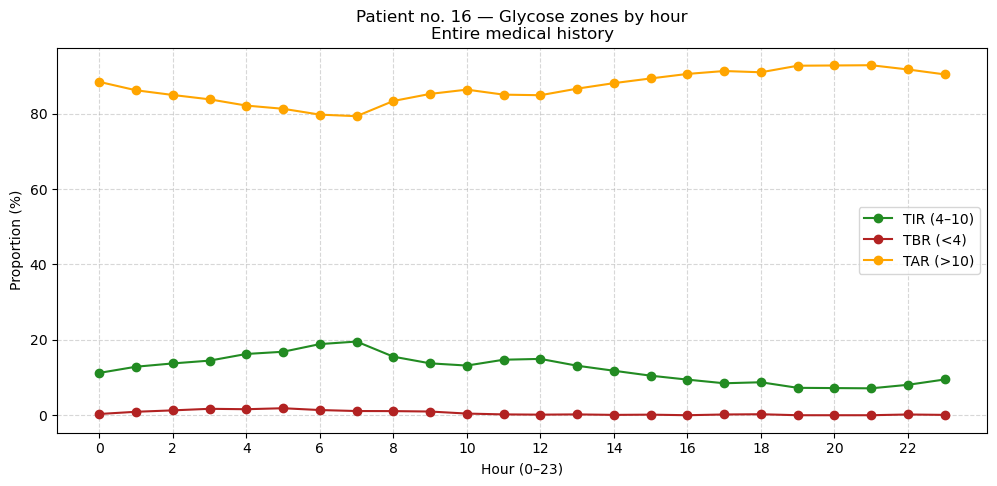

In [ ]:
pt = 16

subset = diadata[diadata['PtID'] == pt].copy()

if subset.empty:
    print(f"Patient no. {pt} has no data.")
else:
    subset['hour'] = subset['DataDtTm'].dt.hour

    subset['zone'] = np.select(
        [subset['CGM_mmol'] < 4,
         subset['CGM_mmol'].between(4, 10),
         subset['CGM_mmol'] > 10],
        ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
        default='missing'
    )

    hourly_summary = (
        subset.groupby('hour')['zone']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )

    for h in range(24):
        if h not in hourly_summary.index:
            hourly_summary.loc[h] = [0,0,0]
    hourly_summary = hourly_summary.sort_index()

    plt.figure(figsize=(12,5))
    plt.plot(hourly_summary.index, hourly_summary.get('TIR (4–10)', 0), marker='o', color='forestgreen', label='TIR (4–10)')
    plt.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='TBR (<4)')
    plt.plot(hourly_summary.index, hourly_summary.get('TAR (>10)', 0), marker='o', color='orange', label='TAR (>10)')

    plt.xticks(range(0,24,2))
    plt.xlabel('Hour (0–23)')
    plt.ylabel('Proportion (%)')
    plt.title(f'Patient no. {pt} — Glycose zones by hour\nEntire medical history')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

In [ ]:
daily = diadata.groupby(['PtID', 'date'])['CGM_mmol'].agg(['mean', 'std', 'min', 'max'])

In [ ]:
diadata['CGM_mmol_diff'] = diadata['CGM_mmol'].diff()
diadata['rolling_mean_mmol'] = diadata['CGM_mmol'].rolling(window=4, min_periods=1).mean()
diadata['rolling_std_mmol'] = diadata['CGM_mmol'].rolling(window=4, min_periods=1).std()
diadata['delta_from_mean'] = diadata['CGM_mmol'] - diadata['rolling_mean_mmol']

In [ ]:
diadata.head()

,DataDtTm,PtID,CGM,Database,date,time,hour,minute,delta_min,time_period,CGM_interp,CGM_mmol,in_range,CGM_category,CGM_mmol_diff,rolling_mean_mmol,rolling_std_mmol,delta_from_mean
0,2014-10-01 19:15:00,1,185.606,D1NAMO,2014-10-01,19:15:00,19,15,NaN,17:00–21:00,185.606,10.311444,False,hyperglycemia,NaN,10.311444,NaN,0.000000
1,2014-10-01 19:20:00,1,178.398,D1NAMO,2014-10-01,19:20:00,19,20,5.0,17:00–21:00,178.398,9.911000,True,in_range,-0.400444,10.111222,0.283157,-0.200222
2,2014-10-01 19:25:00,1,NaN,D1NAMO,2014-10-01,19:25:00,19,25,5.0,17:00–21:00,175.695,9.760833,True,in_range,-0.150167,9.994426,0.284628,-0.233593
3,2014-10-01 19:30:00,1,172.992,D1NAMO,2014-10-01,19:30:00,19,30,5.0,17:00–21:00,172.992,9.610667,True,in_range,-0.150167,9.898486,0.301374,-0.287819
4,2014-10-01 19:35:00,1,169.388,D1NAMO,2014-10-01,19:35:00,19,35,5.0,17:00–21:00,169.388,9.410444,True,in_range,-0.200222,9.673236,0.213837,-0.262792


In [ ]:
list(diadata.columns)

['DataDtTm',
 'PtID',
 'CGM',
 'Database',
 'date',
 'time',
 'hour',
 'minute',
 'delta_min',
 'time_period',
 'CGM_interp',
 'CGM_mmol',
 'in_range',
 'CGM_category',
 'CGM_mmol_diff',
 'rolling_mean_mmol',
 'rolling_std_mmol',
 'delta_from_mean']

In [ ]:
print(patient_date_range(125))
print(patient_date_range(124))
print(patient_date_range(123))

('18.10.2017', '15.05.2018')
('03.02.2000', '24.02.2001')
('01.01.2023', '13.01.2023')


Järjest patsiendid kindlal kuupäevade vahemikul, kus on toodud ära glükoositaseme kõikumised kogu ajateljel(vertikalane tume kriips tähistab kuupäeva muutust); TIR, TAR ja TBR propotsioonid joondiagrammina ning täpsemalt TBR joondiagramm.

NB! Välja on toodud ka öised hüpoglükeemiad (00-06) ja koidikufenomenid (04-06)!

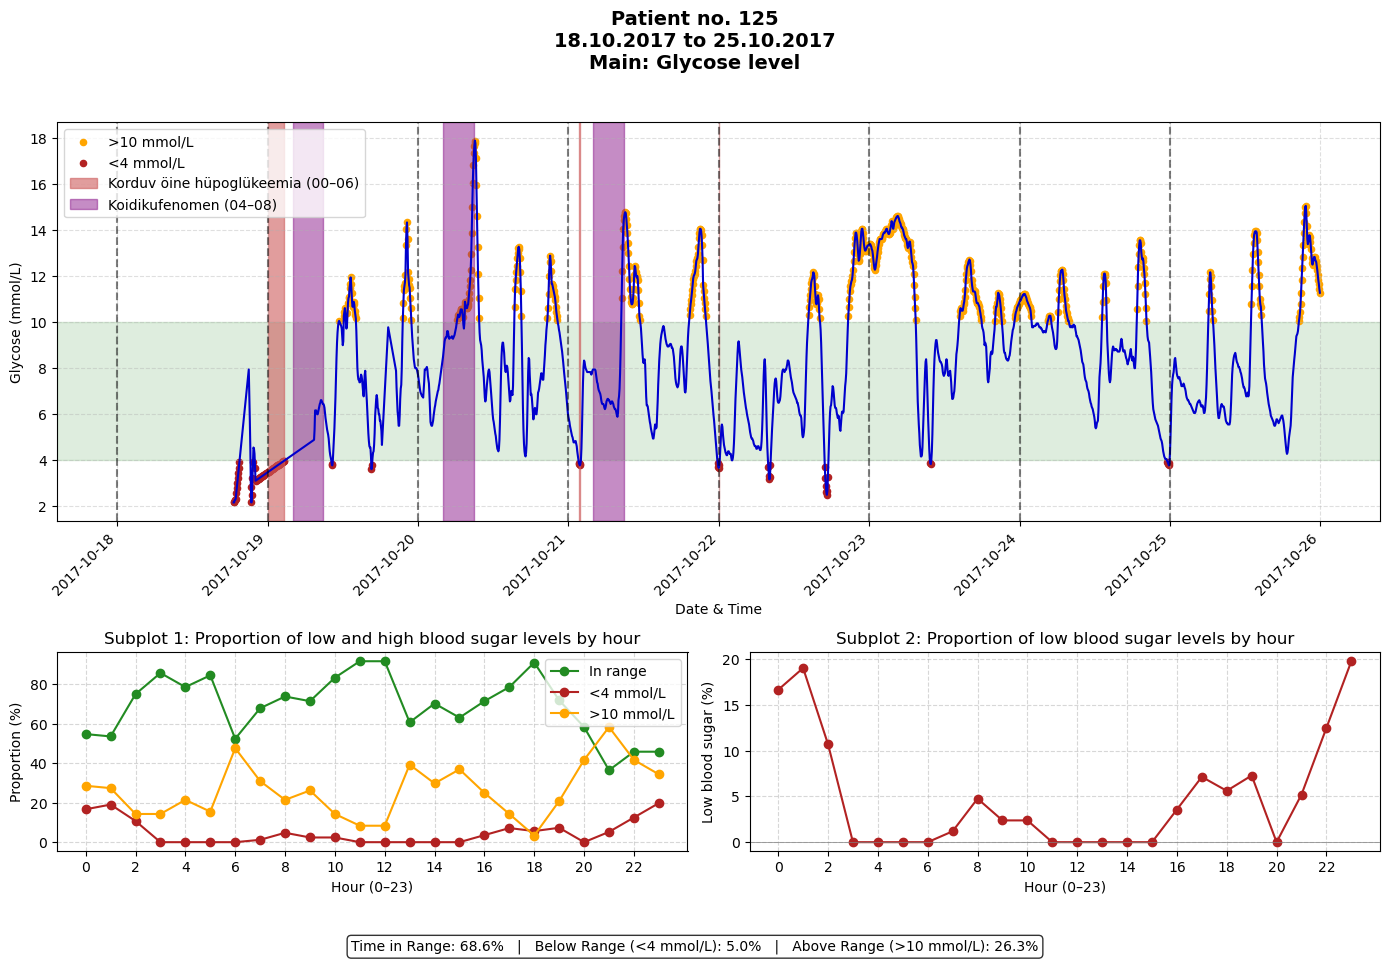

In [ ]:
# For a range of patients
start_date = '2017-10-18'
end_date = '2017-10-25'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

for pt in range(125, 126):
    subset = diadata[
        (diadata['PtID'] == pt) &
        (diadata['date'] >= start_date.date()) &
        (diadata['date'] <= end_date.date())
    ].copy()

    if subset.empty:
        print(f"Patient no. {pt} has no data between {start_date:%d.%m.%Y} -- {end_date:%d.%m.%Y}.")
        continue

    subset['hour'] = subset['DataDtTm'].dt.hour

    subset['zone'] = np.select(
        [subset['CGM_mmol'] < 4,
         subset['CGM_mmol'].between(4, 10),
         subset['CGM_mmol'] > 10],
        ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
        default='missing'
    )

    TIR = (subset['CGM_mmol'].between(4,10)).mean() * 100
    TBR = (subset['CGM_mmol'] < 4).mean() * 100
    TAR = (subset['CGM_mmol'] > 10).mean() * 100

    # Summary by hour
    hourly_summary = (
        subset.groupby('hour')['zone']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )

    for h in range(24):
        if h not in hourly_summary.index:
            hourly_summary.loc[h] = [0,0,0]
    hourly_summary = hourly_summary.sort_index()

    start_date_str = start_date.strftime("%d.%m.%Y")
    end_date_str = end_date.strftime("%d.%m.%Y")
    date_text = start_date_str if start_date_str == end_date_str else f"{start_date_str} to {end_date_str}"

    fig = plt.figure(figsize=(14,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0, :])
    fig.suptitle(f'Patient no. {pt}\n{date_text}\nMain: Glycose level',
                 fontsize=14, fontweight='bold', y=0.95)

    # Main plot: trends of glycose over time
    ax1.axhspan(4, 10, color='forestgreen', alpha=0.15)
    ax1.plot(subset['DataDtTm'], subset['CGM_mmol'], color='mediumblue')
    ax1.scatter(subset['DataDtTm'][subset['CGM_mmol'] > 10], subset['CGM_mmol'][subset['CGM_mmol'] > 10],
                color='orange', s=20, label='>10 mmol/L')
    ax1.scatter(subset['DataDtTm'][subset['CGM_mmol'] < 4], subset['CGM_mmol'][subset['CGM_mmol'] < 4],
                color='firebrick', s=20, label='<4 mmol/L')

    # Öine hüpoglükeemia (00–06)
    night_hours = range(0,6)
    night_label_added = False

    for d in subset['date'].sort_values().unique():
        day_mask = subset['date'] == d
        night_mask = day_mask & subset['hour'].isin(night_hours) & (subset['CGM_mmol'] < 4)

        if night_mask.any():
            start_time = subset.loc[night_mask, 'DataDtTm'].min()
            end_time   = subset.loc[night_mask, 'DataDtTm'].max()
            label = "Korduv öine hüpoglükeemia (00–06)" if not night_label_added else None
            ax1.axvspan(start_time, end_time, color='indianred', alpha=0.6, label=label)
            night_label_added = True

    # Koidikufenomen (04–08)
    dawn_hours = range(4,9)
    dawn_label_added = False

    for d in subset['date'].sort_values().unique():
        day_mask = subset['date'] == d
        before_mask = day_mask & subset['hour'].isin(range(0,4))
        after_mask  = day_mask & subset['hour'].isin(dawn_hours)

        if before_mask.any() and after_mask.any():
            mean_before = subset.loc[before_mask, 'CGM_mmol'].mean()
            mean_after  = subset.loc[after_mask, 'CGM_mmol'].mean()

            if mean_after - mean_before > 1.1:  # tõus > 1.1 mmol/L
                start_time = subset.loc[after_mask, 'DataDtTm'].min()
                end_time   = subset.loc[after_mask, 'DataDtTm'].max()
                label = "Koidikufenomen (04–08)" if not dawn_label_added else None
                ax1.axvspan(start_time, end_time, color='purple', alpha=0.45, label=label)
                dawn_label_added = True

    # Separate date change
    for d in subset['date'].sort_values().unique():
        dt_start = pd.to_datetime(d)
        ax1.axvline(dt_start, color='black', linestyle='--', alpha=0.5)

    ax1.set_xlabel('Date & Time')
    ax1.set_ylabel('Glycose (mmol/L)')
    ax1.grid(True, linestyle='--', alpha=0.4)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.legend(loc='upper left')

    # Subplot 1: proportions
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(hourly_summary.index, hourly_summary.get('TIR (4–10)', 0), marker='o', color='forestgreen', label='In range')
    ax2.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='<4 mmol/L')
    ax2.plot(hourly_summary.index, hourly_summary.get('TAR (>10)', 0), marker='o', color='orange', label='>10 mmol/L')
    ax2.set_title('Subplot 1: Proportion of low and high blood sugar levels by hour')
    ax2.set_xlabel('Hour (0–23)')
    ax2.set_ylabel('Proportion (%)')
    ax2.set_xticks(range(0,24,2))
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.legend()

    # Subplot 2: low glucose details
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='<4 mmol/L')
    ax3.axhline(0, color='gray', linewidth=0.5)
    ax3.set_title('Subplot 2: Proportion of low blood sugar levels by hour')
    ax3.set_xlabel('Hour (0–23)')
    ax3.set_ylabel('Low blood sugar (%)')
    ax3.set_xticks(range(0,24,2))
    ax3.grid(True, linestyle='--', alpha=0.5)

    # Info text
    fig.text(0.5, 0.02,
             f"Time in Range: {TIR:.1f}%   |   Below Range (<4 mmol/L): {TBR:.1f}%   |   Above Range (>10 mmol/L): {TAR:.1f}%",
             ha='center', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.show()

Glükoositasemete ajatelje asemel on nüüd x-teljel tunnid (0-23) ja siis KESKMISTATUD glükoositasemetega tunni lõikes. 2. ja 3. joonis on samad mis enne. Phm on nüüd 2. joonis detailsem lahutus 1. joonisest.

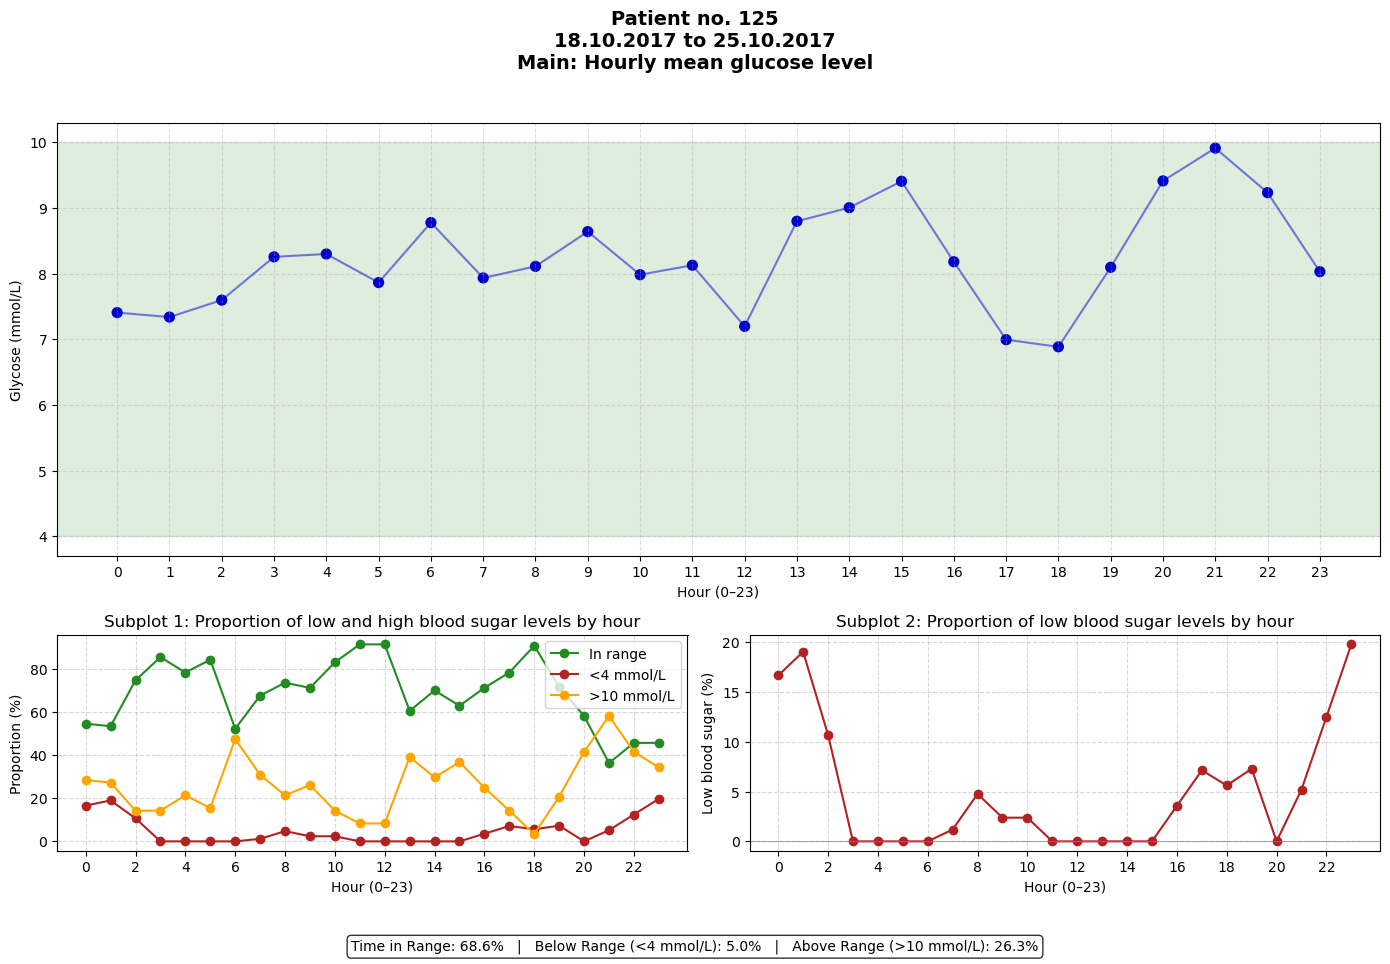

In [ ]:
# For a range of patients
start_date = '2017-10-18'
end_date = '2017-10-25'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

for pt in range(125,126):
    subset = diadata[
        (diadata['PtID'] == pt) &
        (diadata['date'] >= start_date.date()) &
        (diadata['date'] <= end_date.date())
    ].copy()

    if subset.empty:
        print(f"Patient no. {pt} has no data between {start_date:%d.%m.%Y} -- {end_date:%d.%m.%Y}.")
        continue

    subset['hour'] = subset['DataDtTm'].dt.hour

    subset['zone'] = np.select(
        [subset['CGM_mmol'] < 4,
         subset['CGM_mmol'].between(4, 10),
         subset['CGM_mmol'] > 10],
        ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
        default='missing'
    )

    TIR = (subset['CGM_mmol'].between(4,10)).mean() * 100
    TBR = (subset['CGM_mmol'] < 4).mean() * 100
    TAR = (subset['CGM_mmol'] > 10).mean() * 100

    # Summary by hour
    hourly_summary = (
        subset.groupby('hour')['zone']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )

    # Check that all hours from 0 to 23 exist
    for h in range(24):
        if h not in hourly_summary.index:
            hourly_summary.loc[h] = [0,0,0]
    hourly_summary = hourly_summary.sort_index()

    # Aggregate mean glucose per hour for main plot
    hourly_mean = subset.groupby('hour')['CGM_mmol'].mean()

    # Determine colors based on mean glucose
    colors = ['firebrick' if val < 4 else 'orange' if val > 10 else 'mediumblue'
              for val in hourly_mean.values]

    # Format date appearance
    start_date_str = start_date.strftime("%d.%m.%Y")
    end_date_str = end_date.strftime("%d.%m.%Y")

    if start_date_str == end_date_str:
        date_text = f"{start_date_str}"
    else:
        date_text = f"{start_date_str} to {end_date_str}"

    fig = plt.figure(figsize=(14,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0, :])
    fig.suptitle(f'Patient no. {pt}\n{date_text}\nMain: Hourly mean glucose level',
                 fontsize=14, fontweight='bold', y=0.95)

    # Main plot: trends of glycose over time (mean per hour)
    ax1.axhspan(4, 10, color='forestgreen', alpha=0.15)
    ax1.scatter(hourly_mean.index, hourly_mean.values, color=colors, s=50)
    ax1.plot(hourly_mean.index, hourly_mean.values, color='mediumblue', alpha=0.5)

    # --- Öine hüpoglükeemia (00–06) ja Koidikufenomen (04–08) põhinedes hourly_mean ---
    night_hours = range(0,6)
    dawn_hours = range(4,9)

    night_label_added = False
    dawn_label_added  = False

    # Loop for each date (hourly_mean is not date-specific, so the entire sample is used for one plot)
    # Öine hüpoglükeemia: keskmine < 4 mmol/L tunnis 0–5
    if (hourly_mean.loc[hourly_mean.index.isin(night_hours)] < 4).any():
        mask = hourly_mean.index.isin(night_hours) & (hourly_mean < 4)
        if mask.any():
            start_hour = mask.idxmax()          # the first hour that meets the condition
            end_hour   = mask[::-1].idxmax()    # last hour
            label = "Korduv öine hüpoglükeemia (00–06)" if not night_label_added else None
            ax1.axvspan(start_hour, end_hour, color='indianred', alpha=0.6, label=label)
            night_label_added = True

    # Koidikufenomen: tõus >1.1 mmol/L 04–08 vs 00–03
    mean_before = hourly_mean.loc[hourly_mean.index.isin(range(0,4))].mean()
    mean_after  = hourly_mean.loc[hourly_mean.index.isin(dawn_hours)].mean()

    if mean_after - mean_before > 1.1:
        start_hour = dawn_hours.start
        end_hour   = dawn_hours.stop - 1
        label = "Koidikufenomen (04–08)" if not dawn_label_added else None
        ax1.axvspan(start_hour, end_hour, color='purple', alpha=0.45, label=label)
        dawn_label_added = True

    handles, labels = ax1.get_legend_handles_labels()
    if handles:
        ax1.legend()


    ax1.set_xlabel('Hour (0–23)')
    ax1.set_ylabel('Glycose (mmol/L)')
    ax1.grid(True, linestyle='--', alpha=0.4)
    ax1.set_xticks(range(0,24,1))


    # Subplot 1:  proportions of low and high blood sugar levels
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(hourly_summary.index, hourly_summary.get('TIR (4–10)', 0), marker='o', color='forestgreen', label='In range')
    ax2.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='<4 mmol/L')
    ax2.plot(hourly_summary.index, hourly_summary.get('TAR (>10)', 0), marker='o', color='orange', label='>10 mmol/L')
    ax2.set_title('Subplot 1: Proportion of low and high blood sugar levels by hour')
    ax2.set_xlabel('Hour (0–23)')
    ax2.set_ylabel('Proportion (%)')
    ax2.set_xticks(range(0,24,2))
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.legend()

    # Subplot 2
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(hourly_summary.index, hourly_summary.get('TBR (<4)', 0), marker='o', color='firebrick', label='<4 mmol/L')
    ax3.axhline(0, color='gray', linewidth=0.5)
    ax3.set_title('Subplot 2: Proportion of low blood sugar levels by hour')
    ax3.set_xlabel('Hour (0–23)')
    ax3.set_ylabel('Low blood sugar (%)')
    ax3.set_xticks(range(0,24,2))
    ax3.grid(True, linestyle='--', alpha=0.5)

    # Informational text
    fig.text(0.5, 0.02,
             f"Time in Range: {TIR:.1f}%   |   Below Range (<4 mmol/L): {TBR:.1f}%   |   Above Range (>10 mmol/L): {TAR:.1f}%",
             ha='center', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.show()